# How to Find Seasonality Patterns in Time Series

https://medium.com/towards-data-science/how-to-find-seasonality-patterns-in-time-series-c3b9f11e89c6

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filename = '../datasets/knmi.csv'

df_knmi = pd.read_csv(filename, 
                      skiprows=10,
                      skipinitialspace=True)

df_knmi.rename(columns={'# STN': 'STN'}, inplace=True)

df_knmi['dd'] = pd.to_datetime(df_knmi['YYYYMMDD'], format='%Y%m%d')
df_knmi[['TG', 'TN', 'TX']] /= 10

df_knmi = df_knmi.drop(['YYYYMMDD', 'STN'], axis='columns').set_index('dd')

now = pd.Timestamp.now()
start = now - pd.DateOffset(years=10)

df = df_knmi.loc[start:now, ['TG']]
df

,TG
dd,
2015-02-09,5.7
2015-02-10,5.7
2015-02-11,4.2
2015-02-12,2.6
2015-02-13,4.6
...,...
2025-02-01,0.0
2025-02-02,-1.3
2025-02-03,0.4


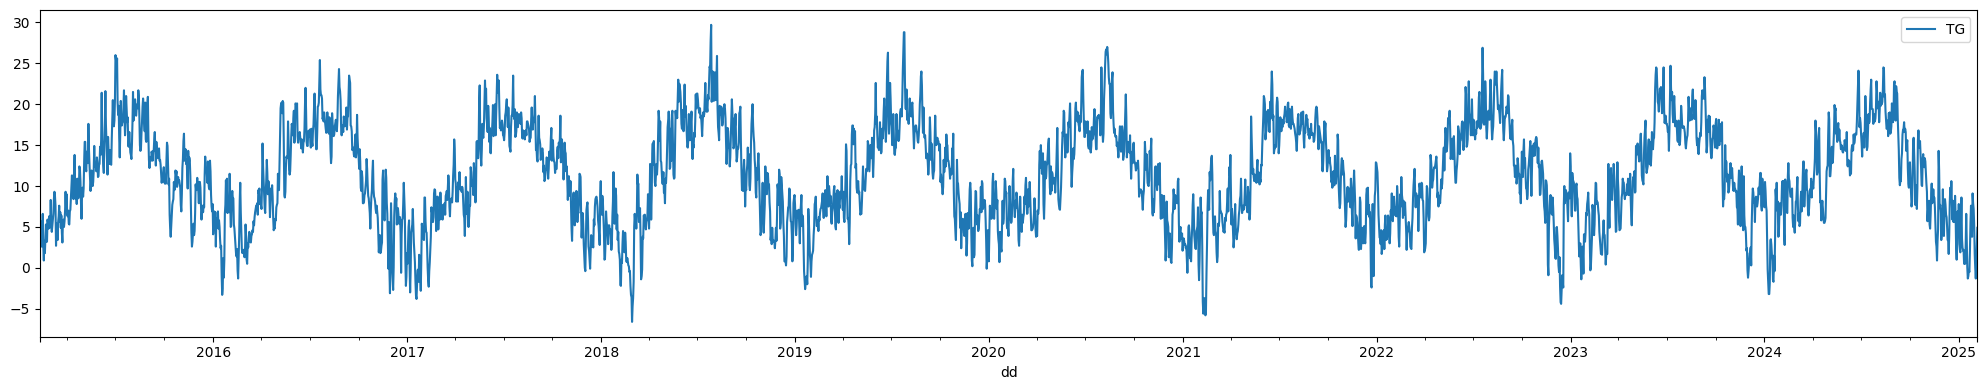

In [9]:
fig, ax = plt.subplots(figsize=(20,4))
df.plot(ax=ax)
plt.tight_layout()
plt.show()

### FFT

/var/folders/03/yj771kx92fj0g_3xbr70x6980000gn/T/ipykernel_35976/639410807.py:6: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / frequencies


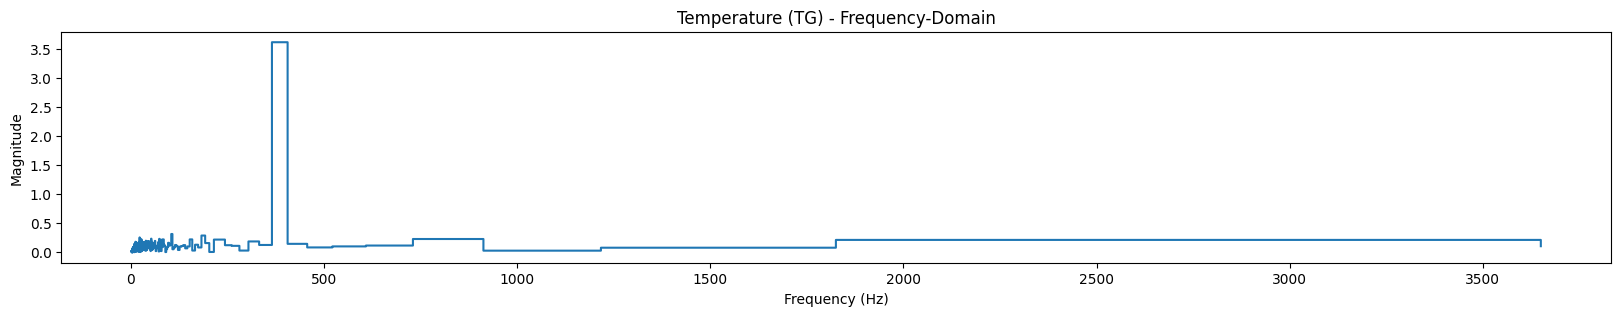

In [10]:
from numpy import fft

X = fft.fft(df['TG'])
N = len(X)
frequencies = fft.fftfreq(N, 1)
periods = 1 / frequencies
fft_magnitude = np.abs(X) / N

mask = frequencies > 0

# Plot the Fourier Transform
fig, ax = plt.subplots(figsize=(20, 3))
ax.step(periods[mask], fft_magnitude[mask]) # Only plot positive frequencies
# ax.set_xscale('log')
# ax.xaxis.set_major_formatter('{x:,.0f}')
ax.set_title('Temperature (TG) - Frequency-Domain')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude')
plt.show()


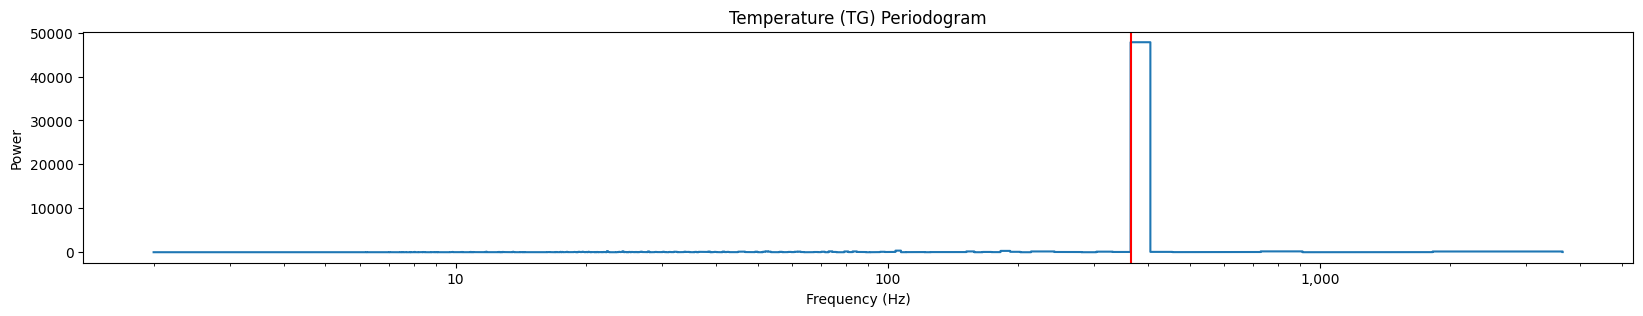

In [11]:
power_spectrum = np.abs(X)**2 / N # Power at each frequency

fig, ax = plt.subplots(figsize=(20, 3))
ax.step(periods[mask], power_spectrum[mask])
ax.axvline(365, color='red')
ax.set_title('Temperature (TG) Periodogram')
ax.set_xscale('log')
ax.xaxis.set_major_formatter('{x:,.0f}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.show()

/var/folders/03/yj771kx92fj0g_3xbr70x6980000gn/T/ipykernel_35976/613321783.py:4: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / frequencies


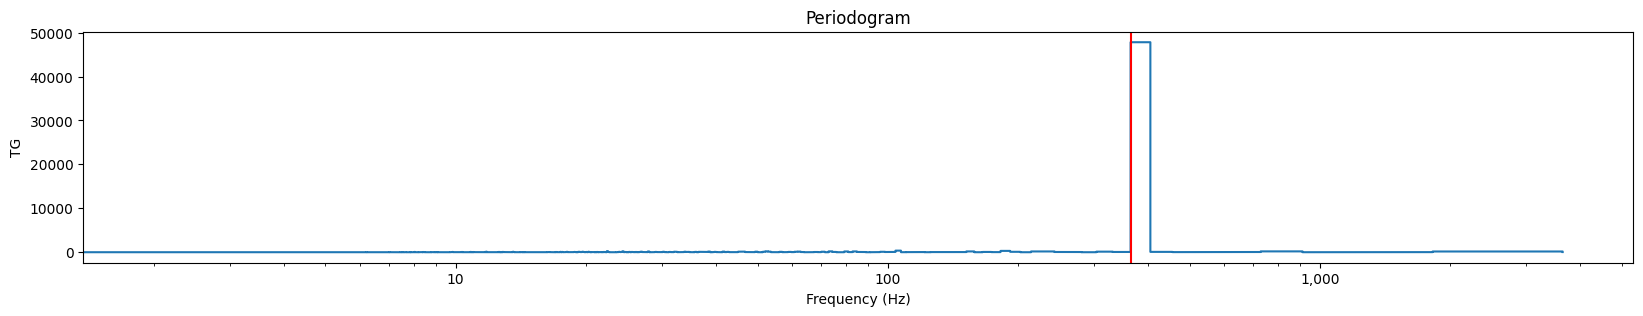

In [12]:
from scipy.signal import periodogram

frequencies, power_spectrum = periodogram(df['TG'], return_onesided=False)
periods = 1 / frequencies

fig, ax = plt.subplots(figsize=(20, 3))
ax.step(periods, power_spectrum)
ax.set_title('Periodogram')
ax.set_xscale('log')
ax.xaxis.set_major_formatter('{x:,.0f}')
ax.axvline(365, color='red')
plt.xlabel('Frequency (Hz)')
plt.ylabel('TG')
plt.show()